In [1]:
import numpy as np
import torch
import os
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import torchsummary
from torch.optim import lr_scheduler

In [152]:
e_m = models.efficientnet_v2_l()
e_m.classifier[-1].out_features
# e_m.classifier.append(nn.Linear(e_m.classifier[-1].in_features, 120))

1000

In [55]:
load_model = torch.load('./model/case_11.pt')
load_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [56]:
test_transforms = transforms.Compose([transforms.Resize(225),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])
                                    ])


DATASET_PATH = './data'
test_data = datasets.ImageFolder(DATASET_PATH + '/test', transform=test_transforms)
test_iter = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True, num_workers=1)

In [81]:
len(test_data)

4116

In [82]:
data_iter = iter(test_iter)
images, labels = next(data_iter)

n_sample = 16

test_x = images[:n_sample]
test_y = labels[:n_sample]

In [58]:
def imshow(image, ax = None, title = None, normalize = True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1,2,0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # ax.thick_params(axis = 'both', length = 0)
    ax.set_title(title)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [60]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [63]:
test_labels_map = {v:k for k, v in test_data.class_to_idx.items()}


{0: 'affenpinscher',
 1: 'afghan_hound',
 2: 'african_hunting_dog',
 3: 'airedale',
 4: 'american_staffordshire_terrier',
 5: 'appenzeller',
 6: 'australian_terrier',
 7: 'basenji',
 8: 'basset',
 9: 'beagle',
 10: 'bedlington_terrier',
 11: 'bernese_mountain_dog',
 12: 'black_and_tan_coonhound',
 13: 'blenheim_spaniel',
 14: 'bloodhound',
 15: 'bluetick',
 16: 'border_collie',
 17: 'border_terrier',
 18: 'borzoi',
 19: 'boston_bull',
 20: 'bouvier_des_flandres',
 21: 'boxer',
 22: 'brabancon_griffon',
 23: 'briard',
 24: 'brittany_spaniel',
 25: 'bull_mastiff',
 26: 'cairn',
 27: 'cardigan',
 28: 'chesapeake_bay_retriever',
 29: 'chihuahua',
 30: 'chow',
 31: 'clumber',
 32: 'cocker_spaniel',
 33: 'collie',
 34: 'curly_coated_retriever',
 35: 'dandie_dinmont',
 36: 'dhole',
 37: 'dingo',
 38: 'doberman',
 39: 'english_foxhound',
 40: 'english_setter',
 41: 'english_springer',
 42: 'entlebucher',
 43: 'eskimo_dog',
 44: 'flat_coated_retriever',
 45: 'french_bulldog',
 46: 'german_sheph

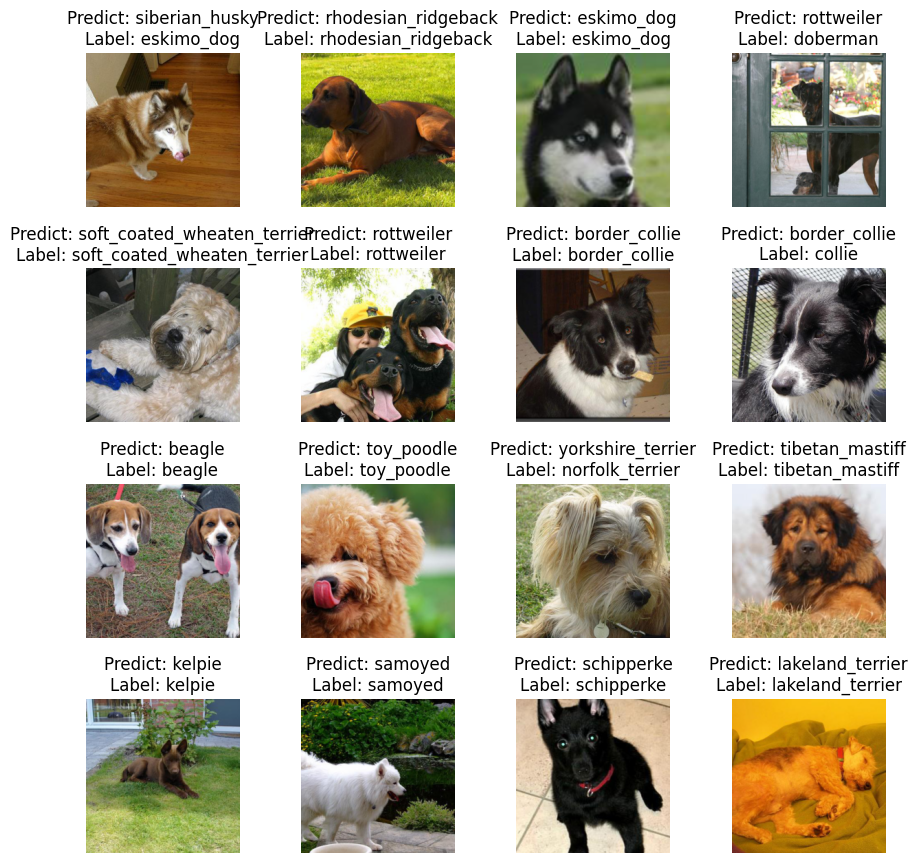

In [83]:
with torch.no_grad():
    load_model.eval()
    y_pred = load_model.forward(test_x.view(-1, 3, 224, 224).type(torch.float).to(device))

y_pred = y_pred.argmax(axis = 1)

plt.figure(figsize=(10, 10))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for idx in range(n_sample):
    ax = plt.subplot(4,4, idx+1)
    title = f'Predict: {test_labels_map[y_pred[idx].item()]}\nLabel: {test_labels_map[test_y[idx].item()]}'
    
    imshow(test_x[idx], ax, title)
    plt.subplot(4, 4, idx+1)
    plt.axis('off')
    # plt.title(f"Predict: {y_pred[idx]}, Label: {test_y[idx]}")
plt.show()

In [108]:
import PIL

In [132]:
# 이미지 텐서화
img = PIL.Image.open('./data/test/affenpinscher/123.JPG')
tf = transforms.Compose([transforms.Resize(225),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])
                        ])

img_t = tf(img)

In [94]:
# 이미지 보기
image = transforms.ToPILImage()
img = image(img_t)
img.show()

In [112]:
test_data.class_to_idx['siberian_husky']

101

In [ ]:
dasomi_y_pred = 101

<Figure size 1000x1000 with 0 Axes>

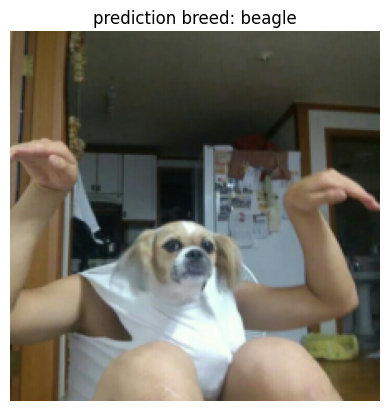

In [133]:
with torch.no_grad():
    load_model.eval()
    dasomi_y_pred = load_model.forward(img_t.view(-1, 3, 224, 224).type(torch.float).to(device))

dasomi_y_pred = dasomi_y_pred.argmax(axis = 1)

plt.figure(figsize=(10, 10))

title = f'prediction breed: {test_labels_map[dasomi_y_pred.item()]}'#\nactual breed: siberian_husky'

imshow(img_t, ax = None, title=title)
# plt.subplot(4, 4, idx+1)
plt.axis('off')
plt.show()